# Week 1 Assignment


# Signal Representation and Sampling

1) Generate a sine wave of frequency 10 Hz with:
Duration = 2seconds and
Sampling rate = 500 Hz.

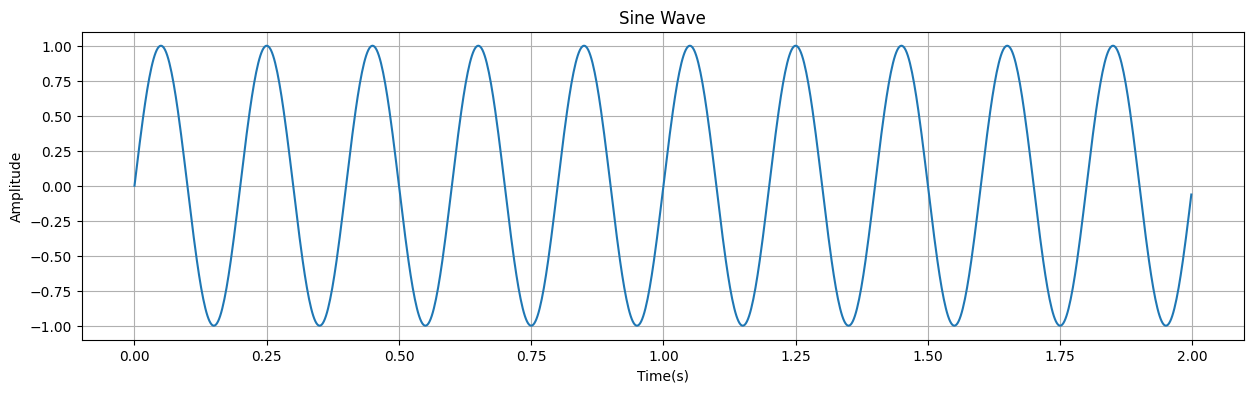

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

frequency = 5
duration = 2
sampling_rate = 500

t = np.linspace(0,duration,int(duration * sampling_rate),endpoint=False)
sine_wave = np.sin(2 * np.pi * frequency * t)

plt.figure(figsize=(15, 4))
plt.plot(t,sine_wave)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Sine Wave')
plt.grid(True)
plt.show()

2) Plot the continuous signal and a discretized version sampled at 40 Hz.

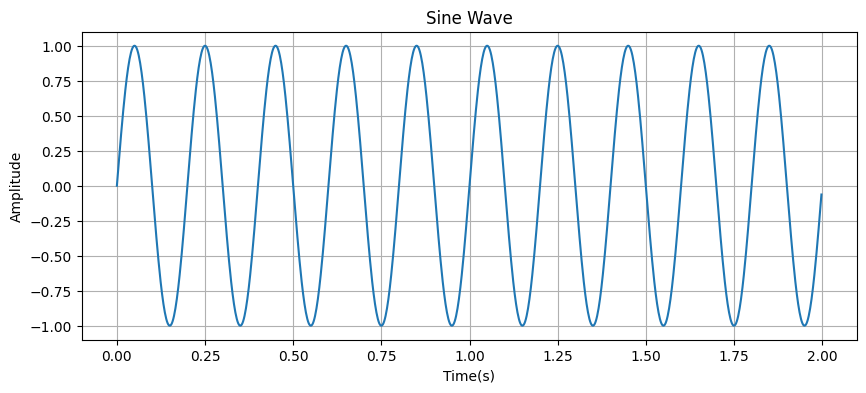

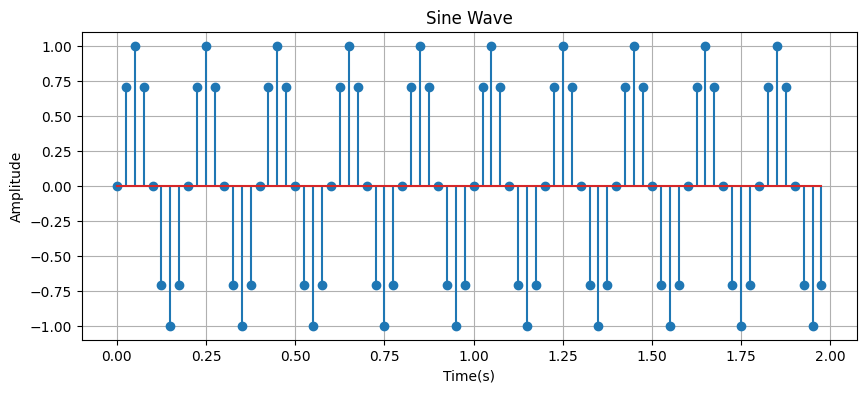

In [ ]:
frequency = 5
duration2 = 2
sampling_rate = 500
sam=40
t = np.linspace(0,duration,int(2 * sampling_rate),endpoint=False)
t_dis= np.arange(0,2,1/sam)
sine_wave = np.sin(frequency*2*np.pi*t)
sine_wave_dis = np.sin(frequency*2*np.pi*t_dis)
plt.figure(figsize=(10, 4))
plt.plot(t,sine_wave)
plt.grid(True)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Sine Wave')

# plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.stem(t_dis,sine_wave_dis)
plt.grid(True)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Sine Wave')

# plt.legend()
plt.show()

3) Experiment: Vary the sampling rate (e.g., 20 Hz, 50 Hz, 100 Hz) and observe the effect on the discrete signal.


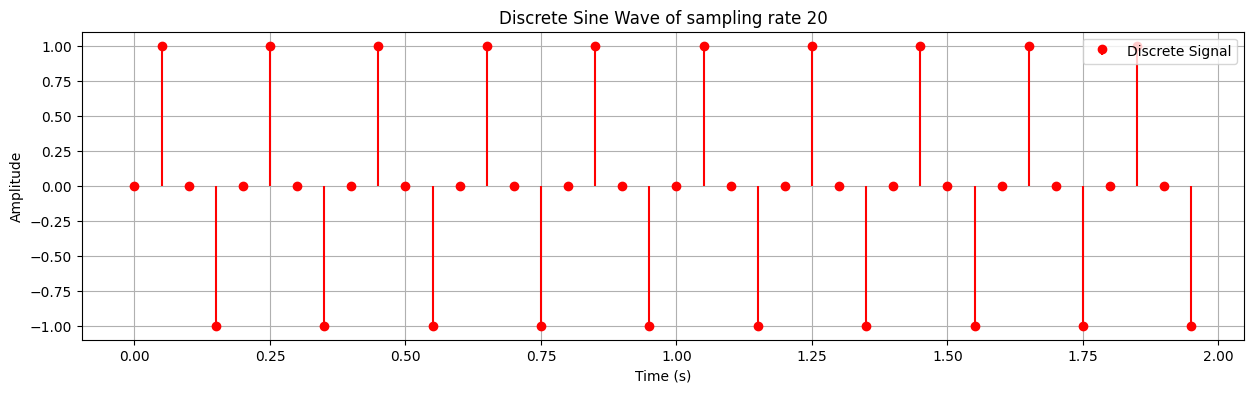

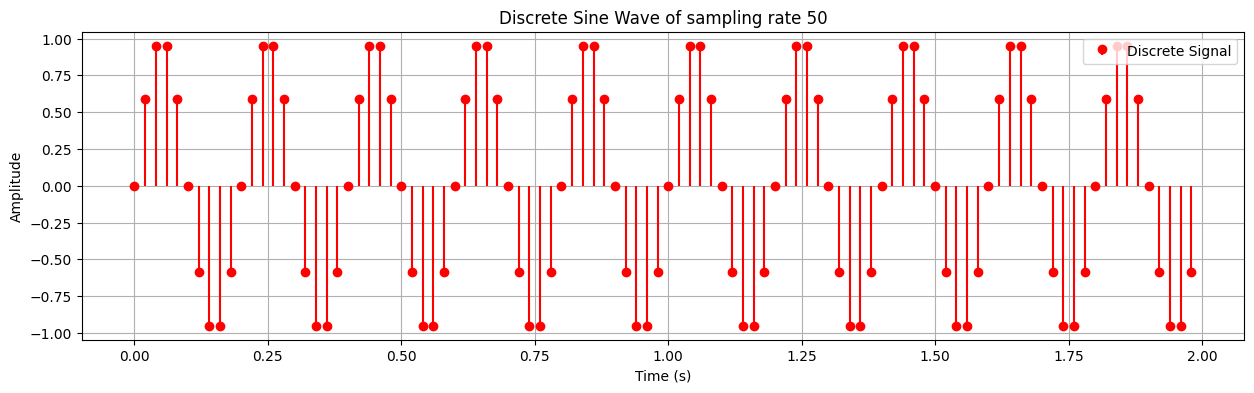

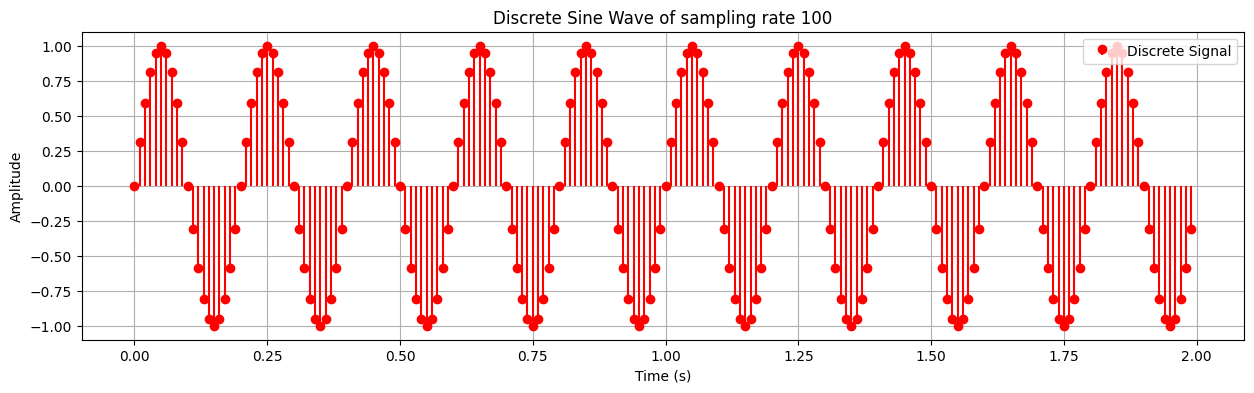

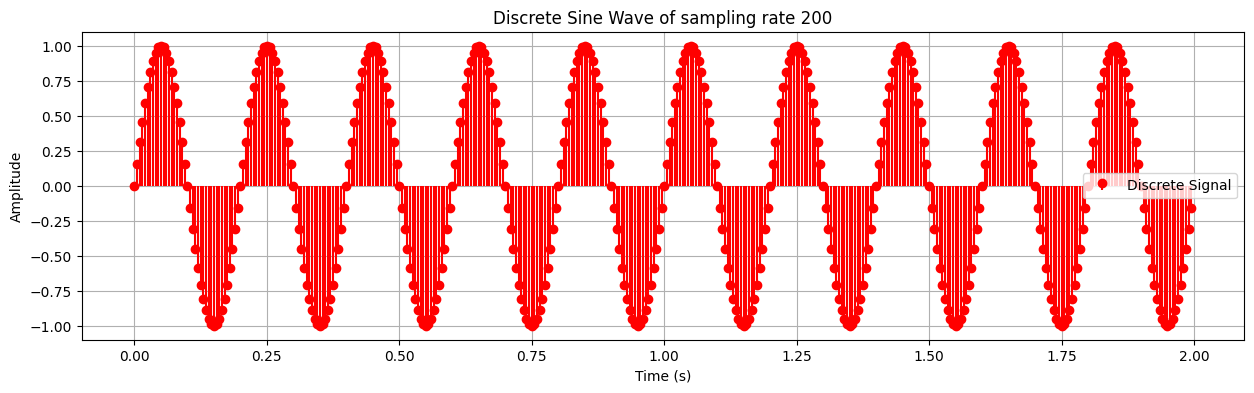


    Observations:
    - As the sampling rate increases number of points in the discrete sine wave increases. Eventually it almost becoming continuous at certain large sampling rate.
    


In [ ]:
sampling_rate_variable = [20,50,100,200]

for rate in sampling_rate_variable:
    time_continuous = np.linspace(0,duration,int(duration * rate),endpoint=False)
    sine_wave_continuous = np.sin(2 * np.pi * frequency * time_continuous)

    plt.figure(figsize=(15, 4))
    plt.stem(time_continuous, sine_wave_continuous, linefmt='r-', markerfmt='ro', basefmt=" ", label="Discrete Signal")
    plt.title(f"Discrete Sine Wave of sampling rate {rate}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()
plt.show()

print(
    """
    Observations:
    - As the sampling rate increases number of points in the discrete sine wave increases. Eventually it almost becoming continuous at certain large sampling rate.
    """
)

# Fourier Transform and Frequency Domain Analysis

1) Generate a composite signal by summing two sine waves with frequencies 5 Hz and 20 Hz.

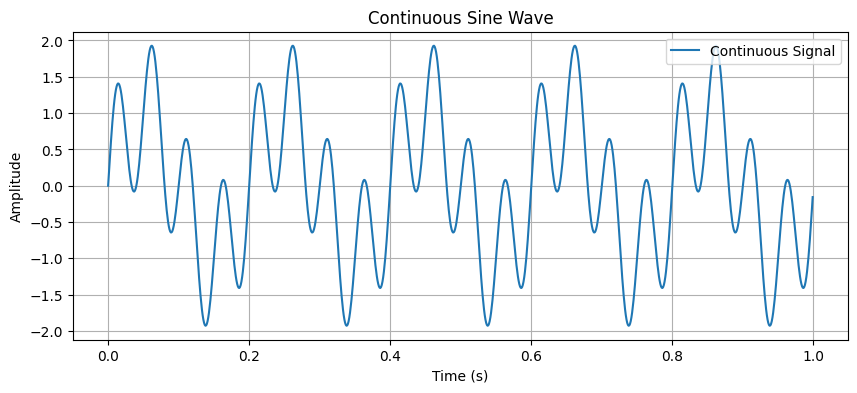

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
freq1=5
freq2=20
duration=1
sam_rate=1000
x_axis=np.linspace(0,duration,int(sam_rate*duration),endpoint=False)
y_axis=np.sin(2*(np.pi)*freq1*x_axis)+np.sin(2*(np.pi)*freq2*x_axis)
plt.figure(figsize=(10, 4))
plt.plot(x_axis,y_axis, label="Continuous Signal")
plt.title("Continuous Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

2) Perform the Fourier Transform (FT) on the composite signal,
plot the magnitude spectrum and identify the prominent frequency components.

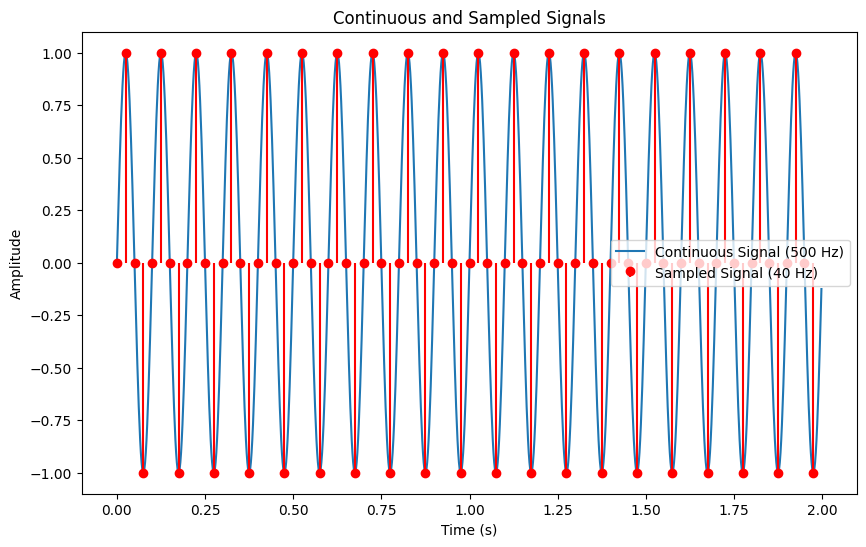

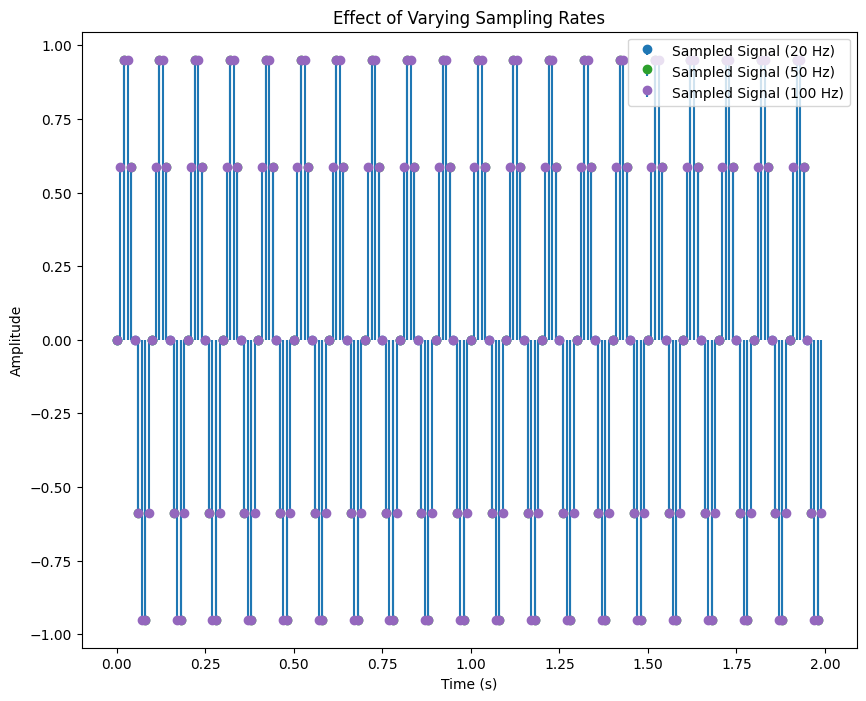

In [ ]:
# Prompt 1
fs_500 = 500  # Sampling rate 500 Hz
duration = 2  # Duration in seconds
f_10 = 10  # Frequency in Hz
t_500 = np.linspace(0, duration, int(fs_500 * duration), endpoint=False)
signal_500 = np.sin(2 * np.pi * f_10 * t_500)

# Prompt 2
fs_40 = 40  # Sampling rate 40 Hz
t_40 = np.linspace(0, duration, int(fs_40 * duration), endpoint=False)
signal_40 = np.sin(2 * np.pi * f_10 * t_40)

plt.figure(figsize=(10, 6))
plt.plot(t_500, signal_500, label="Continuous Signal (500 Hz)")
plt.stem(t_40, signal_40, linefmt='r-', markerfmt='ro', basefmt=' ', label="Sampled Signal (40 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Continuous and Sampled Signals")
plt.legend()
plt.show()

# Prompt 3
sampling_rates = [20, 50, 100]
plt.figure(figsize=(10, 8))
for fs in sampling_rates:
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    signal = np.sin(2 * np.pi * f_10 * t)
    plt.stem(t, signal, label=f"Sampled Signal ({fs} Hz)", linefmt='-', markerfmt='o', basefmt=' ')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Effect of Varying Sampling Rates")
plt.legend()
plt.show()

# Audio Signal Analysis

1) Upload like 5 audio but belonging to the same category, like animals, music instruments and stuff (e.g.wav or .mp3) and load it using librosa.

In [ ]:
from google.colab import drive
import librosa
import os
drive.mount('/content/drive')
audio_folder = '/content/drive/My Drive/AudioNetAssign1/'
audio_files = [os.path.join(audio_folder, f) for f in os.listdir(audio_folder)]

audio_data={}
for file_name in audio_files:
    print(f"Loading file: {file_name}")
    y, sr = librosa.load(file_name, sr=None)
    audio_data[file_name] = {'y': y, 'sr': sr}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading file: /content/drive/My Drive/AudioNetAssign1/Sound5.mp3
Loading file: /content/drive/My Drive/AudioNetAssign1/Sound4.mp3
Loading file: /content/drive/My Drive/AudioNetAssign1/Sound3.mp3
Loading file: /content/drive/My Drive/AudioNetAssign1/Sound2.mp3
Loading file: /content/drive/My Drive/AudioNetAssign1/Sound1.mp3


2) Plot the waveform of the audio signal.

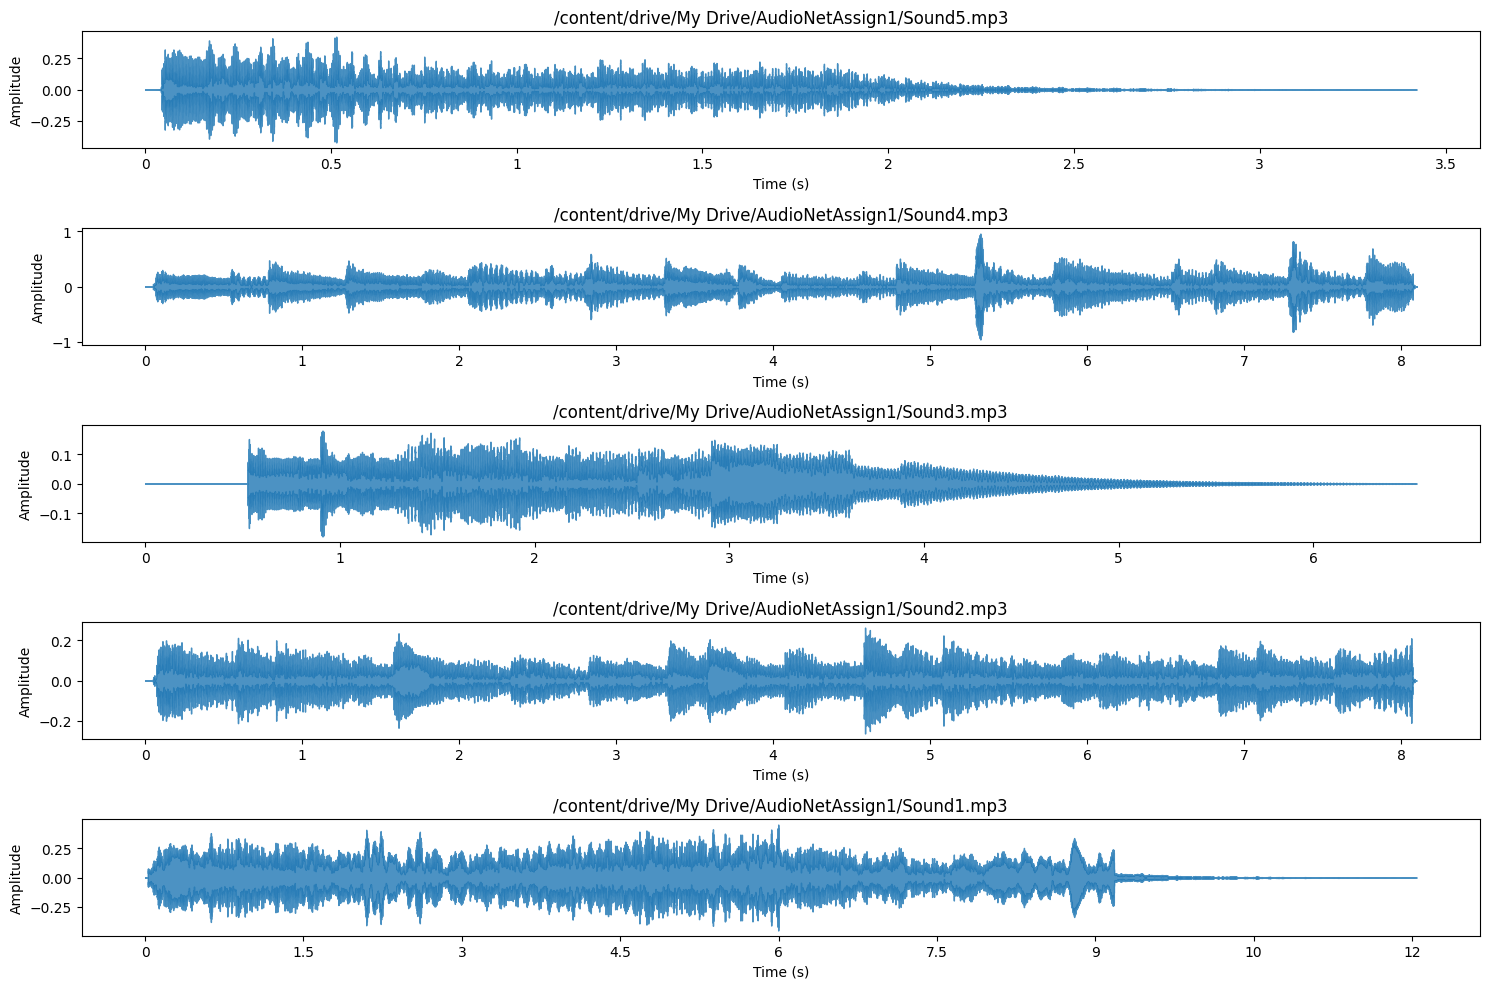

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
for i, (file_name, data) in enumerate(audio_data.items(), start=1):
    y = data['y']
    sr = data['sr']

    plt.subplot(5, 1, i)
    librosa.display.waveshow(y, sr=sr, alpha=0.8)
    plt.title(f"{file_name}", fontsize=12)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

3) Perform the Fourier Transform (FT) and plot the magnitude spectrum.

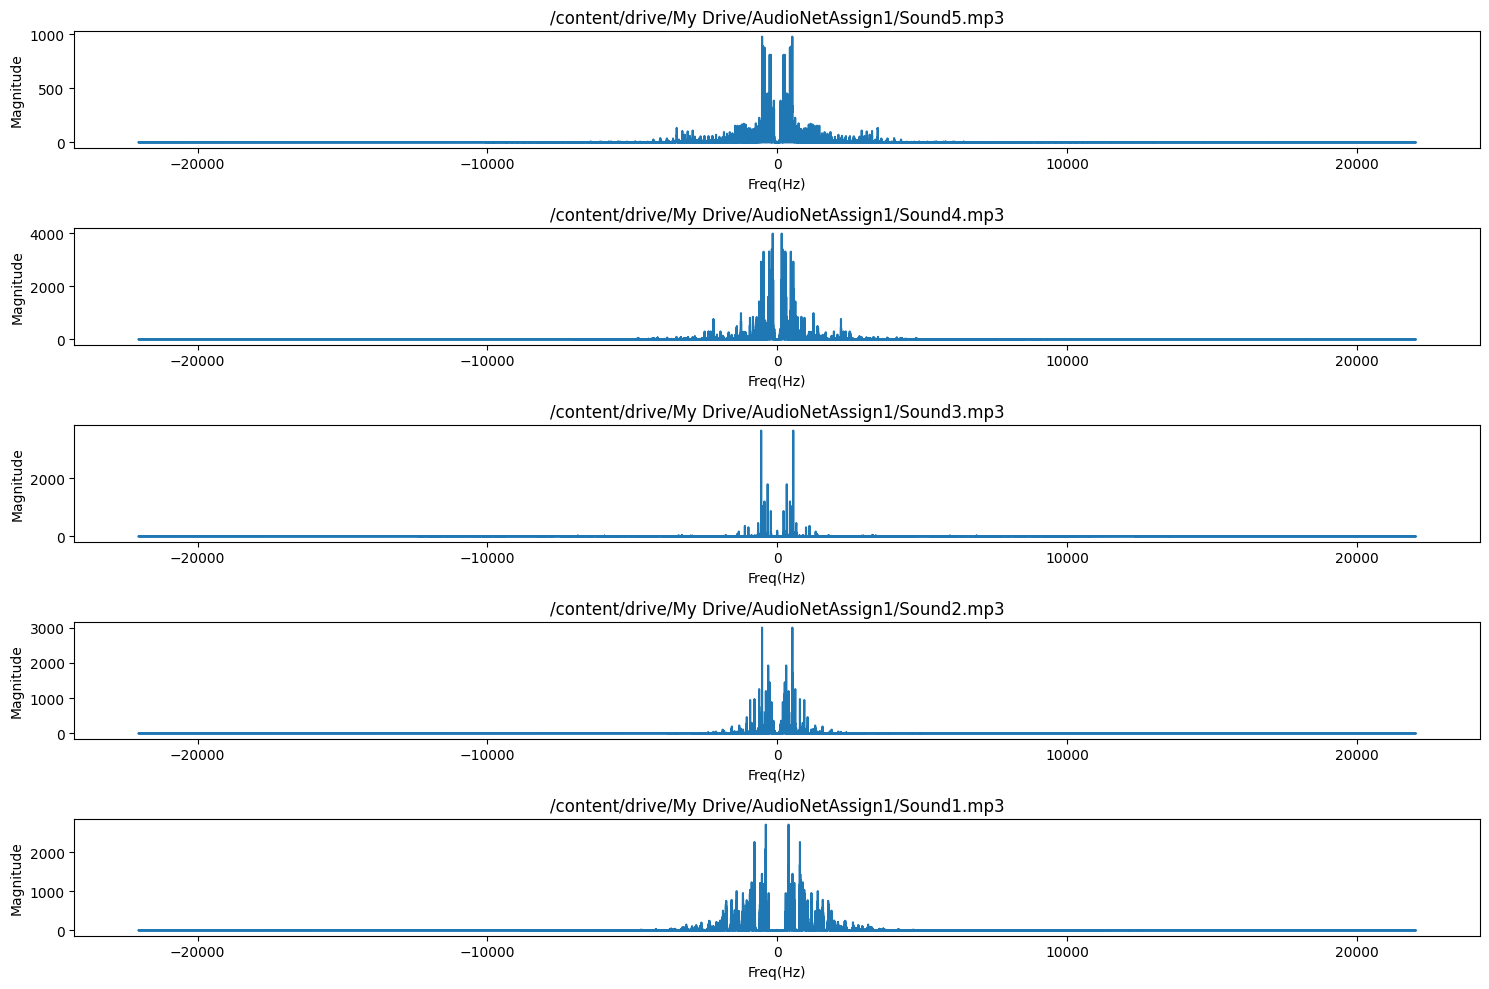

In [ ]:
import numpy as np
plt.figure(figsize=(15, 10))
for i, (file_name, data) in enumerate(audio_data.items(), start=1):
    y = data['y']
    sr = data['sr']

    fft_result = np.fft.fft(y)
    magnitude_spectrum = np.abs(fft_result)
    frequency_axis = np.fft.fftfreq(len(y), 1/sr)

    plt.subplot(5, 1, i)
    plt.plot(frequency_axis, magnitude_spectrum)
    plt.title(f"{file_name}", fontsize=12)
    plt.xlabel("Freq(Hz)")
    plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

4) Compute and visualize the STFT for the audio signal using scipy.signal.stft.

Experiment with different window sizes (e.g., 256, 1024, 4096).
Discuss the trade-off between time and frequency resolution.

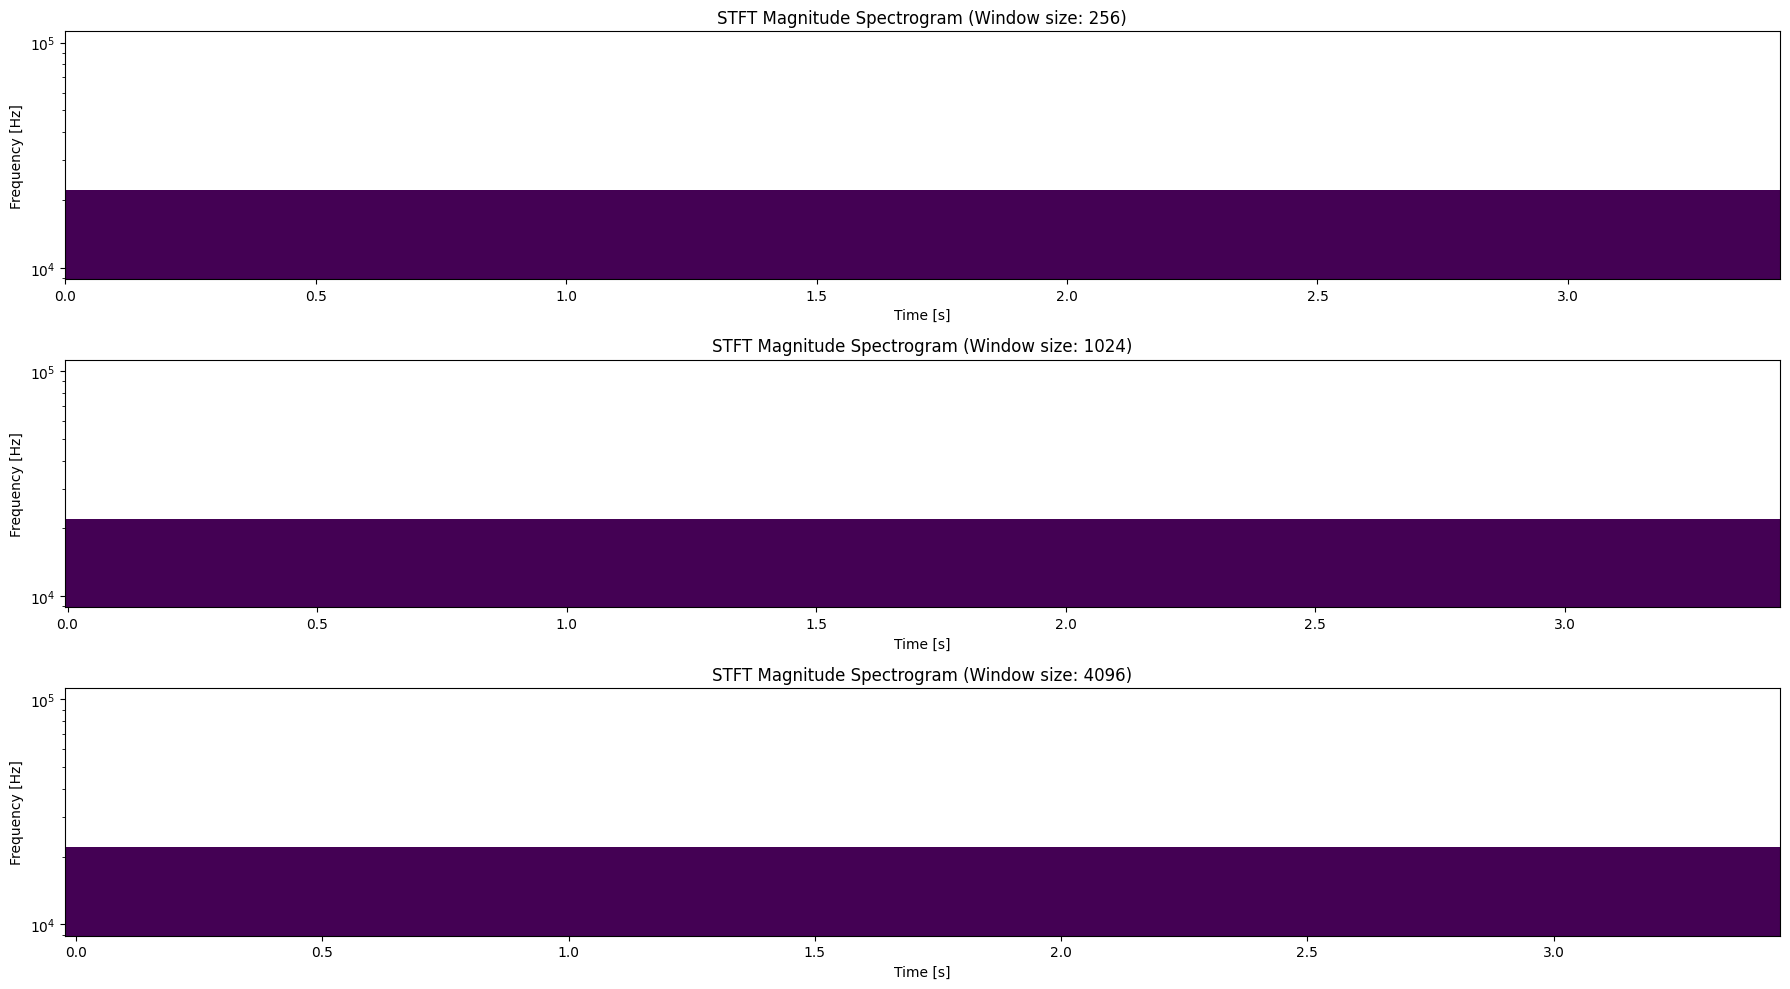

In [ ]:
from scipy.signal import stft
window_sizes = [256, 1024, 4096]
plt.figure(figsize=(18, 10))
_,data1 = list(audio_data.items())[0]
y= data1['y']
sr= data1['sr']
for i, window_size in enumerate(window_sizes, 1):

    f, t, Zxx = signal.stft(y, fs=sr, nperseg=window_size)

    plt.subplot(3, 1, i)
    plt.pcolormesh(t, f, np.abs(Zxx), shading='auto')
    plt.title(f"STFT Magnitude Spectrogram (Window size: {window_size})")
    plt.xlabel("Time [s]")
    plt.ylabel("Frequency [Hz]")
    plt.yscale('log')

plt.tight_layout()
plt.show()

# Spectrogram Visualization

1) Create spectrogram for the audio files uploaded  using librosa.display.specshow.

<ipython-input-48-571f31201624>:5: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


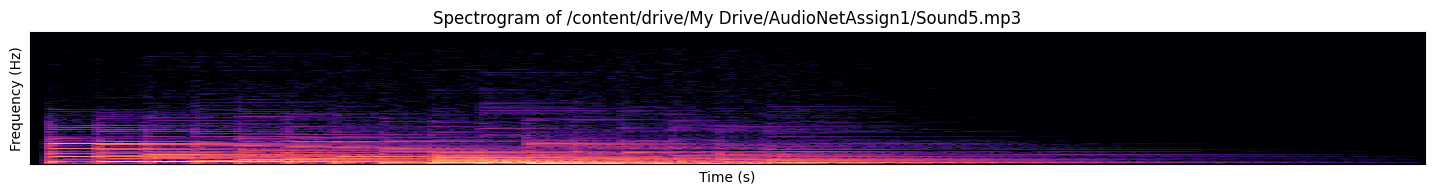

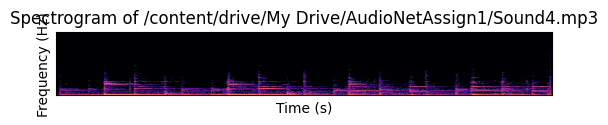

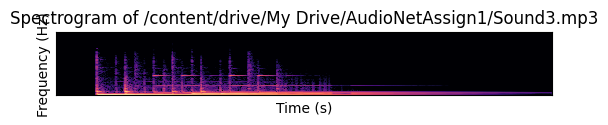

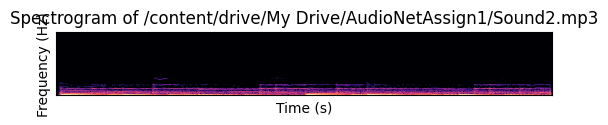

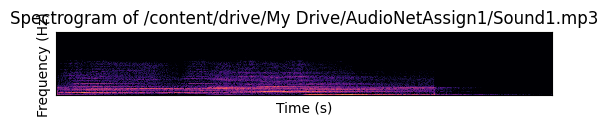

In [ ]:
plt.figure(figsize=(18, 10))
for file_name, data in audio_data.items():
    y = data['y']
    sr = data['sr']
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)

    plt.subplot(5, 1, i)
    librosa.display.specshow(D, sr=sr)
    plt.title(f'Spectrogram of {file_name}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

2) Experiment with
logarithmic scaling for frequency and
different color maps for better visualization.

<ipython-input-53-c23bc24baba8>:5: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


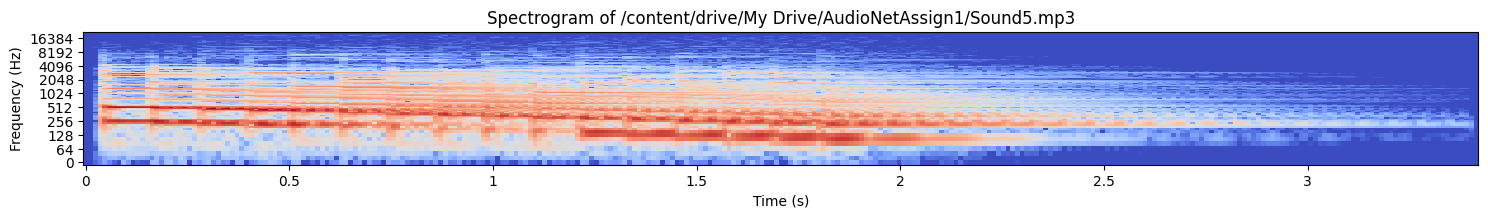

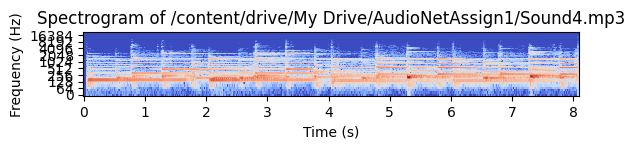

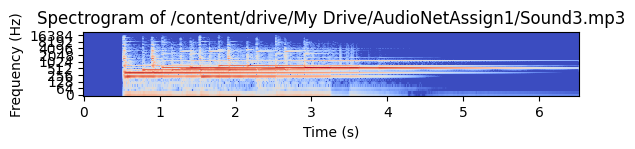

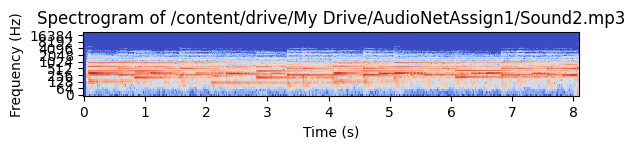

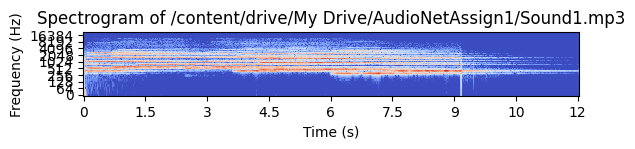

In [ ]:
plt.figure(figsize=(18, 10))
for file_name, data in audio_data.items():
    y = data['y']
    sr = data['sr']
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)

    plt.subplot(5, 1, i)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log',cmap = 'coolwarm')
    plt.title(f'Spectrogram of {file_name}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

3) Discuss how the spectrogram helps visualize frequency changes over time.

The color or intensity of each point on the spectrogram represents the amplitude or power at that particular frequency and time. Brighter or more intense colors indicate higher energy at that frequency at that specific moment.

# Quantization

1) Simulate a 50 Hz sine wave sampled at 1000 Hz.

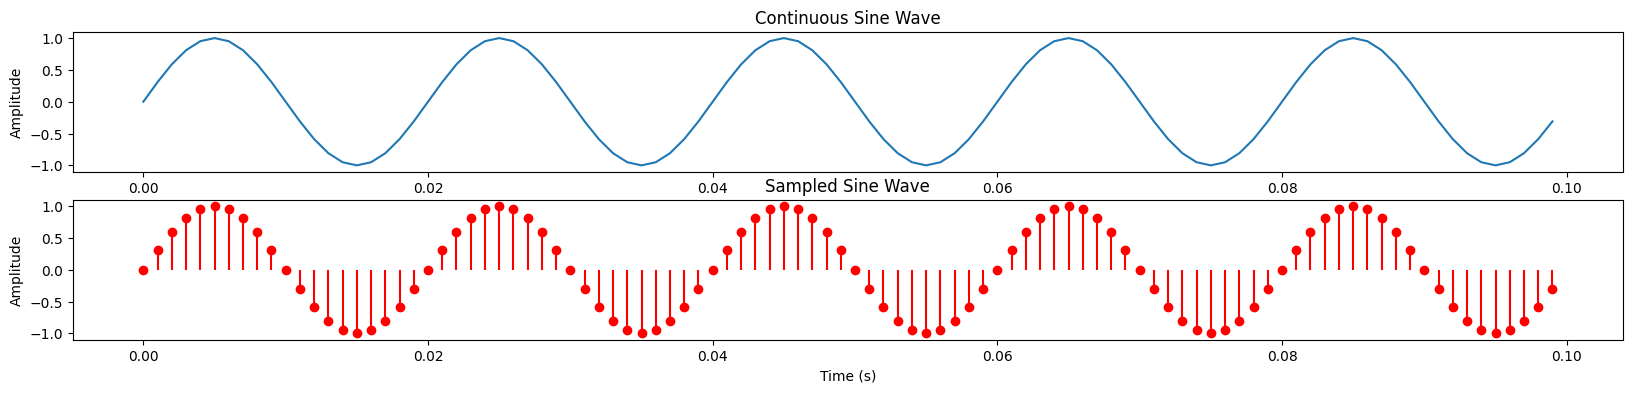

In [ ]:
frequency= 50
duration= 0.1
sampling_rate= 1000
t = np.linspace(0,duration,int(duration * sampling_rate),endpoint=False)
sine_wave = np.sin(2 * np.pi * frequency * t)
plt.figure(figsize=(20, 4))
plt.subplot(2, 1, 1)
plt.plot(t, sine_wave, label="Continuous Signal")
plt.title("Continuous Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

time_discrete = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
sine_wave_discrete = np.sin(2 * np.pi * frequency * time_discrete)
plt.subplot(2, 1, 2)
plt.stem(time_discrete, sine_wave_discrete, linefmt='r-', markerfmt='ro', basefmt=' ', label="Sampled Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sampled Sine Wave")

plt.show()

2) Quantize the signal with different bit depths (e.g., 8-bit, 4-bit).

In [ ]:
bit_depths = [8, 4]
quantized_signals = {}
for bit_depth in bit_depths:
    step_size = 2 / (2 ** bit_depth)
    quantized_signal = np.round(sine_wave_discrete / step_size) * step_size
    quantized_signals[bit_depth] = quantized_signal

3) Plot and compare
the original signal and the
quantized signals for each bit depth.

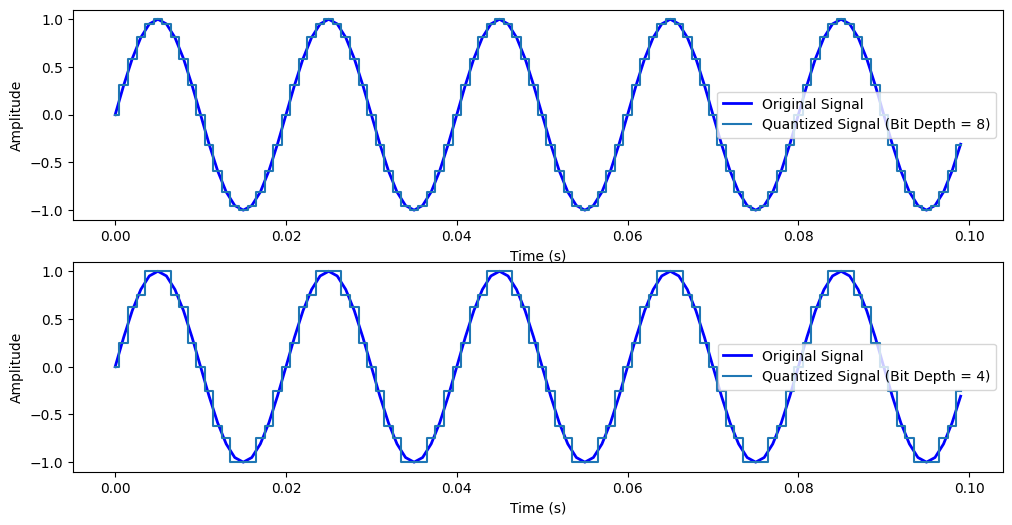

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_discrete, sine_wave_discrete, label="Original Signal", color='b', lw=2)
plt.step(time_discrete, quantized_signals[8], label=f"Quantized Signal (Bit Depth = 8)", where='mid')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time_discrete, sine_wave_discrete, label="Original Signal", color='b', lw=2)
plt.step(time_discrete, quantized_signals[4], label=f"Quantized Signal (Bit Depth = 4)", where='mid')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

plt.show()